<a href="https://colab.research.google.com/github/201820722/time-series-detection/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import matplotlib.dates as mdates
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from PIL import Image

In [ ]:
df = pd.read_csv('./Merged_Data.csv')
df = df.drop(['12FW-BFPMST:CS'], axis=1)
df = df.drop(['Time'], axis=1)

In [ ]:
df.describe()

,12CD-TE01B,12CW-TE01C,12CW-TE01D,12CW-TE02C-M,12CW-TE02D-M,12DH-MW,12DH-BSSPU,12CM-PT01B,12CM-TE01B,12MK-CVRP_BFPB,12HE-FT02B,12HE-PT05,12HE-TE02B
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.237962,0.335610,0.321585,0.162970,0.170781,0.000661,0.000345,0.997041,0.637571,0.023123,0.092806,0.092179,0.002458
std,0.058759,0.050999,0.053947,0.019438,0.019657,0.008396,0.000023,0.018072,0.096492,0.000577,0.047180,0.000031,0.010855
min,0.149076,0.181535,0.137715,0.094278,0.098974,0.000101,0.000263,0.555754,0.543706,0.021078,0.000000,0.092095,0.000000
25%,0.197470,0.312078,0.293064,0.154628,0.162052,0.000314,0.000330,0.996998,0.549232,0.022797,0.052142,0.092157,0.001138
50%,0.228103,0.336922,0.322840,0.165417,0.173725,0.000405,0.000346,0.997944,0.551049,0.023199,0.105333,0.092171,0.001887
75%,0.261514,0.370333,0.360151,0.176375,0.184553,0.000603,0.000361,0.998673,0.752711,0.023554,0.117262,0.092193,0.003570
max,0.409406,0.556530,0.449601,0.202212,0.213590,0.325642,0.000431,1.000000,0.764217,0.024116,0.214311,0.092264,0.419333


In [ ]:
print(df.max())
print(df.min())

12CD-TE01B        0.409406
12CW-TE01C        0.556530
12CW-TE01D        0.449601
12CW-TE02C-M      0.202212
12CW-TE02D-M      0.213590
12DH-MW           0.325642
12DH-BSSPU        0.000431
12CM-PT01B        1.000000
12CM-TE01B        0.764217
12MK-CVRP_BFPB    0.024116
12HE-FT02B        0.214311
12HE-PT05         0.092264
12HE-TE02B        0.419333
dtype: float64
12CD-TE01B        0.149076
12CW-TE01C        0.181535
12CW-TE01D        0.137715
12CW-TE02C-M      0.094278
12CW-TE02D-M      0.098974
12DH-MW           0.000101
12DH-BSSPU        0.000263
12CM-PT01B        0.555754
12CM-TE01B        0.543706
12MK-CVRP_BFPB    0.021078
12HE-FT02B        0.000000
12HE-PT05         0.092095
12HE-TE02B        0.000000
dtype: float64


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.describe()

,12CD-TE01B,12CW-TE01C,12CW-TE01D,12CW-TE02C-M,12CW-TE02D-M,12DH-MW,12DH-BSSPU,12CM-PT01B,12CM-TE01B,12MK-CVRP_BFPB,12HE-FT02B,12HE-PT05,12HE-TE02B
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.341436,0.410873,0.589543,0.636424,0.626502,0.001720,0.487218,0.993340,0.425670,0.673186,0.433044,0.497173,0.005862
std,0.225709,0.135999,0.172970,0.180094,0.171499,0.025792,0.134257,0.040681,0.437582,0.190016,0.220148,0.183292,0.025886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185895,0.348121,0.498097,0.559134,0.550342,0.000655,0.399365,0.993242,0.025061,0.565735,0.243302,0.367404,0.002715
50%,0.303564,0.414372,0.593568,0.659101,0.652184,0.000934,0.491613,0.995372,0.033299,0.697991,0.491494,0.446395,0.004501
75%,0.431907,0.503468,0.713197,0.760625,0.746657,0.001542,0.582793,0.997013,0.947824,0.815080,0.547156,0.576093,0.008515
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
tmp = scaled_df['12CD-TE01B'].to_list()
arr = np.array(tmp)
for i in range(len(arr)):
  arr[i] = arr[i]*255
arr = np.array(arr, dtype=np.int64)
print(arr)

[89 88 89 ...  0  2  2]


<class 'PIL.Image.Image'>


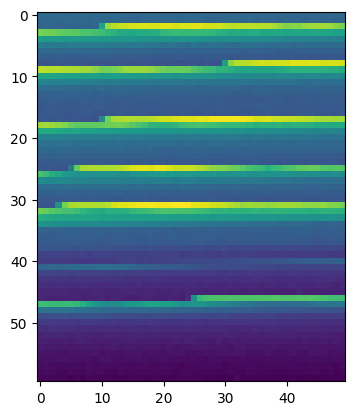

In [ ]:
arr = np.reshape(arr, (60, 50))
img = Image.fromarray(arr.astype(np.uint8))
plt.imshow(img)
print(type(img))
img.save('/content/drive/MyDrive/Colab Notebooks/output1.png', 'png')

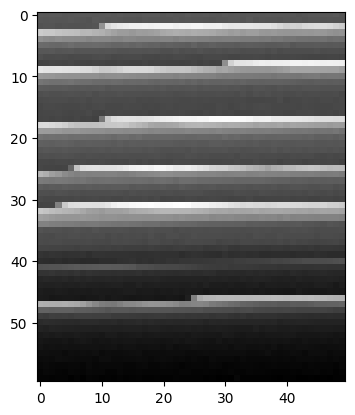

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/output1.png')
plt.imshow(img)
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2

In [ ]:
d = 5
fshift[crow-d:crow+d, ccol-d:ccol+d] = 1

In [ ]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

In [ ]:
img_new = np.uint8(img_back);
ret, thresh = cv2.threshold(img_new,30,255,cv2.THRESH_BINARY_INV)

(Text(0.5, 1.0, 'Input Image'), ([], []), ([], []))

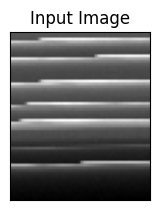

In [ ]:
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Spectrum'), ([], []), ([], []))

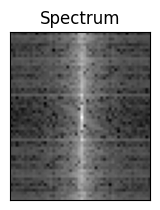

In [ ]:
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'FT'), ([], []), ([], []))

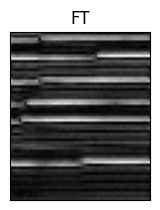

In [ ]:
plt.subplot(223),plt.imshow(img_back, cmap = 'gray')
plt.title('FT'), plt.xticks([]), plt.yticks([])

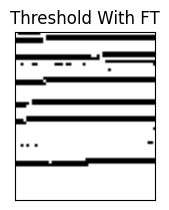

In [ ]:
plt.subplot(224),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# 날짜별로 분리해서 차이를 검출할 것
# 과거의 패턴과 현재의 패턴을 비교해서 이상치를 검출하는 것이 목표기 때문
# 시간 순으로 나눴을 때 이미지를 여러장 겹쳐서 뽑는 느낌으로 진행하자.